In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def get_clean_paths(user, fork_or_spoon= 'fork'):
    parent_path = "clean_data/" + user + '/' + fork_or_spoon
    #dir_list = os.listdir(parent_path)
    EMG_eating_txt_path = parent_path + "/" + "eating_EMG.txt"
    EMG_not_eating_txt_path = parent_path + "/" + "not_eating_EMG.txt"
    IMU_eating_txt_path = parent_path + "/" + "eating_IMU.txt"
    IMU_not_eating_txt_path = parent_path + "/" + "not_eating_IMU.txt"
    master_EMG_path = parent_path + "/" + "master_dfEMG.txt"
    master_IMU_path = parent_path + "/" + "master_dfIMU.txt"
    return (master_EMG_path, EMG_eating_txt_path, EMG_not_eating_txt_path, master_IMU_path, IMU_eating_txt_path, IMU_not_eating_txt_path)

def get_clean_df(user = "user10", data_for="EMG", fork_or_spoon="fork", eating=True, master=False):
    paths = get_clean_paths(user, fork_or_spoon)
    if data_for == "EMG":
        if master:
            return pd.read_csv(paths[0], sep=",", index_col=0)
        elif eating:
            return pd.read_csv(paths[1], sep=",", index_col=0)
        else:
            return pd.read_csv(paths[2], sep=",", index_col=0)

    elif( data_for == "IMU"):
        if master:
            return pd.read_csv(paths[3], sep=",", index_col=0)
        elif eating:
            return pd.read_csv(paths[4], sep=",", index_col=0)
        else:
            return pd.read_csv(paths[5], sep=",", index_col=0)
    

In [102]:
df1 = get_clean_df(eating=True)
df2 = get_clean_df(eating=False)
df1_IMU = get_clean_df(data_for="IMU",eating=True)
df2_IMU = get_clean_df(data_for="IMU",eating=False)
df_master_EMG = get_clean_df(master=True)
df_master_IMU = get_clean_df(data_for="IMU",master=True)

# RMS

In [344]:
# RMS_feature_extraction(df1,df2)
# RMS_feature_extraction(df1_IMU,df2_IMU)
def RMS_feature_extraction(df1,df2,row_wise=True,user="user10"):
    if row_wise:
        axis = 0
        n = (df1.iloc[:,1:-1]).shape[0]
    else:
        axis = 1 
        n = (df1.iloc[:,1:-1]).shape[1]
    try:
        ax = (((df1.iloc[:,1:-1]**2).sum(axis))/n).pow(1/2).plot(label='eating',legend=True)
        ((df2.iloc[:,1:-1]**2).sum(axis)/n).pow(1/2).plot(ax=ax,label='not eating',legend=True, title=user)
        plt.xticks(rotation=70)
        plt.show()
    except:
        print("error in RMS_feature_extraction()")

# avg

In [34]:
# AVG_feature_extraction(df1,df2)
# AVG_feature_extraction(df1_IMU,df2_IMU)
def AVG_feature_extraction(df1,df2,row_wise=True,user="user10"):
    if row_wise:
        axis = 0
    else:
        axis = 1 
    try:
        ax = ((df1.iloc[:,1:-1]).abs().mean(axis)).plot(label='eating',legend=True)
        ((df2.iloc[:,1:-1]).abs().mean(axis)).plot(ax=ax,label='not eating',legend=True, title=user)
        plt.xticks(rotation=70)
        plt.show()
    except:
        print("error in AVG_feature_extraction()")

# min

In [345]:
# MIN_feature_extraction(df1,df2)
def MIN_feature_extraction(df1,df2,row_wise=True,user="user10"):
    if row_wise:
        axis = 0
    else:
        axis = 1 
    try:
        ax = ((df1.iloc[:,1:-1]).min(axis)).plot(label='eating',legend=True)
        ((df2.iloc[:,1:-1]).min(axis)).plot(ax=ax,label='not eating',legend=True, title=user)
        plt.xticks(rotation=70)
        plt.show()
    except:
        print("error in MIN_feature_extraction()")

# max

In [47]:
MAX_feature_extraction(df1,df2)
MAX_feature_extraction(df1_IMU,df2_IMU)
def MAX_feature_extraction(df1,df2,row_wise=True,user="user10"):
    if row_wise:
        axis = 0
    else:
        axis = 1 
    try:
        ax = ((df1.iloc[:,1:-1]).abs().max(axis)).plot(label='eating',legend=True)
        ((df2.iloc[:,1:-1]).abs().max(axis)).plot(ax=ax,label='not eating',legend=True, title=user)
        plt.xticks(rotation=70)
        plt.show()
    except:
        print("error in AVG_feature_extraction()")

# std

In [346]:
# STD_feature_extraction(df1,df2)
# STD_feature_extraction(df1_IMU,df2_IMU)
def STD_feature_extraction(df1,df2,row_wise=True,user="user10"):
    if row_wise:
        axis = 0
    else:
        axis = 1 
    try:
        ax = ((df1.iloc[:,1:-1]).std(axis)).plot(label='eating',legend=True)
        ((df2.iloc[:,1:-1]).std(axis)).plot(ax=ax,label='not eating',legend=True, title=user)
        plt.xticks(rotation=70)
        plt.show()
    except:
        print("error in AVG_feature_extraction()")

# Make the feature matrix

In [418]:
# total_samples = 2*df1.shape[0]
# feature_df = pd.DataFrame() 
feature_df['min'] = ((data_df.iloc[:,1:-1]).abs().min(1))
feature_df['max'] = ((data_df.iloc[:,1:-1]).abs().max(1))
feature_df['STD'] = ((data_df.iloc[:,1:-1]).std(1))
feature_df['AVG'] = (data_df.iloc[:,1:-1]).abs().mean(1)
feature_df['RMS'] = (((data_df.iloc[:,1:-1]**2).sum(1))/8).pow(1/2)
def get_data_df(df1,df2):
    return df1.append(df2, ignore_index=True)

def get_feature_df(df1, data_df):
    total_samples = 2*df1.shape[0]
    feature_df = pd.DataFrame() 
    feature_df['min'] = ((data_df.iloc[:,1:-1]).abs().min(1))
    feature_df['max'] = ((data_df.iloc[:,1:-1]).abs().max(1))
    feature_df['STD'] = ((data_df.iloc[:,1:-1]).std(1))
    feature_df['AVG'] = (data_df.iloc[:,1:-1]).abs().mean(1)
    feature_df['RMS'] = (((data_df.iloc[:,1:-1]**2).sum(1))/8).pow(1/2)
    return feature_df

# PCA

In [419]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [422]:
pca = PCA()
pca.fit(feature_df)
pca.explained_variance_ratio_
pca.explained_variance_
eigenvalues = pca.explained_variance_
eigenvectors = pca.components_
# feature_df.dot(eigenvectors[0])
# plt.plot(eigenvectors[0])
# plt.plot(eigenvectors[1])
# plt.plot(eigenvectors[2])
# plt.plot(eigenvectors[3])
# plt.show()
# feature_df.dot(eigenvectors[0])
#pca_2 = PCA()
#principalComponents = pca_2.fit_transform(feature_df_std)
#pd.DataFrame(data=principalComponents, columns = ['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5'])

In [421]:
data_df = get_data_df(df1,df2)
feature_df = get_feature_df(df1, data_df)

X = feature_df
X_std = StandardScaler().fit_transform(feature_df)


In [423]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
# print('Covariance matrix \n%s' %cov_mat)
# print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

In [424]:
cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

# print('Eigenvectors \n%s' %eig_vecs)
# print('\nEigenvalues \n%s' %eig_vals)

In [425]:
cor_mat1 = np.corrcoef(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat1)

# print('Eigenvectors \n%s' %eig_vecs)
# print('\nEigenvalues \n%s' %eig_vals)

In [426]:
cor_mat2 = np.corrcoef(X.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat2)

# print('Eigenvectors \n%s' %eig_vecs)
# print('\nEigenvalues \n%s' %eig_vals)

In [427]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
4.042198254978751
0.795705094582244
0.09975570154920377
0.05973748649022106
0.0026034623995844705


In [428]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

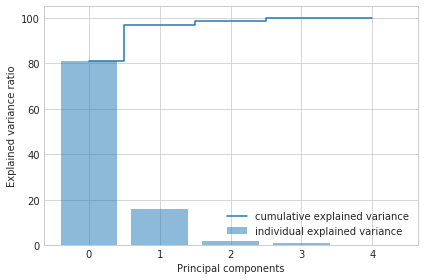

In [429]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(5), var_exp, alpha=0.5, align='center',label='individual explained variance')
    plt.step(range(5), cum_var_exp, where='mid',label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [430]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(5,1),
                      eig_pairs[1][1].reshape(5,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[-0.27848869 -0.92430696]
 [-0.47449829  0.24388155]
 [-0.47116743  0.26088106]
 [-0.48224961 -0.07516388]
 [-0.49267838  0.1116687 ]]


In [431]:
y = data_df.iloc[:,-1]
#y == False

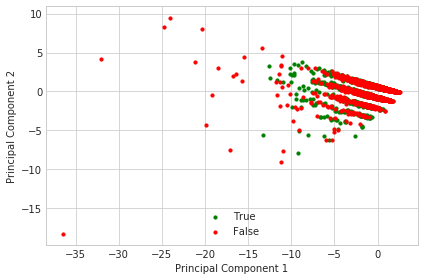

In [432]:
Y = X_std.dot(matrix_w)
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, color in zip((True, False),
                        ('green', 'red')):
        
        plt.scatter(Y[y==lab, 0],
                    Y[y==lab, 1],
                    label=lab,
                    c=color,
                    s=10)
                   
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

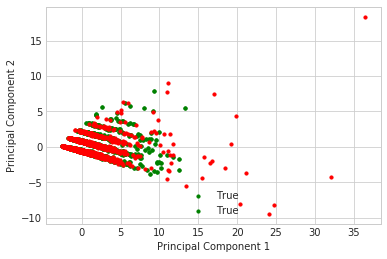

In [443]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X_std)

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip((True,True),
                        ('green','green')):
        plt.scatter(Y_sklearn[y==lab, 0],
                    Y_sklearn[y==lab, 1],
                    label=lab,
                    c=col,
                    s=10)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    #plt.tight_layout()
    #plt.show()

    #plt.figure(figsize=(6, 4))

    plt.scatter(Y_sklearn[y==False, 0],
                Y_sklearn[y==False, 1],
                label=False,
                c='red',
                s=10)
    #plt.xlabel('Principal Component 1')
    #plt.ylabel('Principal Component 2')
    #plt.legend(loc='lower center')
    #plt.tight_layout()
    plt.show()